<br><br><br><br><br>

# The Scientific Python Ecosystem

<br><br><br><br><br>

<br><br><br><br><br>

<p style="font-size: 1.25em; text-align: center;"><b>Who has ever used Python?</b> <i>(Show of hands.)</i></p>

<br><br><br><br><br>

<br><br><br><br><br>

<p style="font-size: 1.25em; text-align: center;"><b>Who has used Python more than C or C++?</b> <i>(Show of hands.)</i></p>

<br><br><br><br><br>

<br><br><br><br><br>

<p style="font-size: 1.25em; text-align: center;"><b>Who has ever used PyROOT?</b> <i>(Show of hands.)</i></p>

<br><br><br><br><br>

<br><br><br><br><br>

<p style="font-size: 1.25em; text-align: center;"><b>Who has ever used Numpy?</b> <i>(Show of hands.)</i></p>

<br><br><br><br><br>

<br><br><br><br><br>

<p style="font-size: 1.25em; text-align: center;"><b>Who has ever used Matplotlib?</b> <i>(Show of hands.)</i></p>

<br><br><br><br><br>

<br><br><br><br><br>

<p style="font-size: 1.25em; text-align: center;"><b>Who has ever used Pandas?</b> <i>(Show of hands.)</i></p>

<br><br><br><br><br>

<br><br><br><br><br>

<p style="font-size: 1.25em; text-align: center;"><b>Who has used Python for machine learning?</b> <i>(Show of hands.)</i></p>

<br><br><br><br><br>

<br><br><br><br><br>

### Part 1: Why Python in particle physics?

<br><br><br><br><br>

<br>

<p style="font-size: 1.25em">I could point to its broad adoption as a programming language...</p>

<center><img src="img/pypl-2019.png" width="75%"></center>

<br>

<br>

<p style="font-size: 1.25em">But it is more relevant to point to its use in data analysis.</p>

<center><img src="img/python-r-cpp-googletrends-dataset.png" width="75%"></center>

<br>

<center><img src="img/python-r-cpp-googletrends-machinelearning.png" width="75%"></center>

<br>

<br>

<p style="font-size: 1.25em">It's hard to overstate the scale of these communities.</p>

<center><img src="img/root-spark-pandas-google-trends.png" width="75%"></center>

<br>

<p style="font-size: 1.1em">There is value in adopting popular tools: every question/error message is googlable...</p>

<br>

<p style="font-size: 1.25em">The growth of Python in astronomy is... astronomical.</p>

<table width="100%"><tr style="background: white"><td><img src="img/mentions-of-programming-languages.png" width="100%"></td><td><img src="img/ligo-notebook.png" width="100%"></td></tr></table>

<br><br>

<p style="font-size: 1.25em">It's the language of choice for some—but not all—LHC experiments.</p>

<img src="img/github-cmssw-lin.png" width="100%">

<br><br>

<br><br>

<p style="font-size: 1.25em">It's the language of choice for some—but not all—LHC experiments.</p>

<img src="img/github-alice-lin.png" width="100%">

_(Can't measure ATLAS and LHCb because of private repos on GitLab.)_

<br><br>

<br>

<img src="img/commute-by-plane.png" width="60%"> _(Stolen from Jake Vanderplas.)_

<br>

<br><br>

<p style="font-size: 1.25em; font-weight: bold">Drive to the airport, then take a plane:</p>

   * Not everything needs to be fast, only the part that scales with the number of events (or other large number, like number of histogram bins or MC toys).
   
     The rest of the analysis code is bookkeeping: convenience outweighs speed.
     
   * Need to step up from interactive tinkering to full-scale analysis __*in small steps*__. Scale-up "quasistatically" to avoid a big round of bug-hunting.

<br><br>

In [1]:
# Example: code to compute a fractal (calendar/mousepad/T-shirt...).
import time, numpy

def run_python(height, width, maxiterations=20):
    y, x = numpy.ogrid[-1:0:height*1j, -1.5:0:width*1j]
    c = x + y*1j
    fractal = numpy.full(c.shape, maxiterations, dtype=numpy.int32)
    for h in range(height):
        for w in range(width):               # for each pixel (h, w)...
            z = c[h, w]
            for i in range(maxiterations):   # iterate at most 20 times
                z = z**2 + c[h, w]           # applying z → z² + c
                if abs(z) > 2:               # if it diverges (|z| > 2)
                    fractal[h, w] = i        # color with the iteration number
                    break                    # we're done, no need to keep iterating
    return fractal

starttime = time.time()
fractal = run_python(800, 1200)
print("{0} ns per pixel".format(1e9 * (time.time() - starttime) / (800 * 1200)))

7307.679454485576 ns per pixel


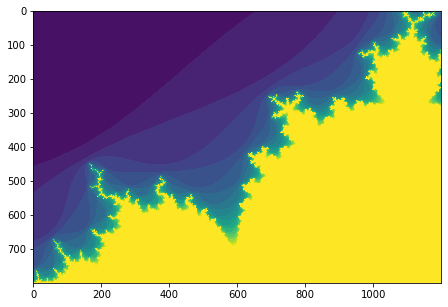

In [2]:
# Pretty, isn't it?

%matplotlib inline
import matplotlib.pyplot
fig, ax = matplotlib.pyplot.subplots(figsize=(10, 5)); ax.imshow(fractal);

In [3]:
# REMINDER: the original code...


def run_python(height, width, maxiterations=20):
    y, x = numpy.ogrid[-1:0:height*1j, -1.5:0:width*1j]
    c = x + y*1j
    fractal = numpy.full(c.shape, maxiterations, dtype=numpy.int32)



    for h in range(height):
        for w in range(width):               # for each pixel (h, w)...
            z = c[h, w]
            for i in range(maxiterations):   # iterate at most 20 times
                z = z**2 + c[h, w]           # applying z → z² + c
                if abs(z) > 2:               # if it diverges (|z| > 2)
                    fractal[h, w] = i        # color with the iteration number
                    break                    # we're done, no need to keep iterating
    return fractal





In [4]:
# 50× to 100× faster...
import numba

def run_numba(height, width, maxiterations=20):
    y, x = numpy.ogrid[-1:0:height*1j, -1.5:0:width*1j]
    c = x + y*1j
    fractal = numpy.full(c.shape, maxiterations, dtype=numpy.int32)
    return tight_loop(height, width, maxiterations, c, fractal)
@numba.jit
def tight_loop(height, width, maxiterations, c, fractal):
    for h in range(height):
        for w in range(width):               # for each pixel (h, w)...
            z = c[h, w]
            for i in range(maxiterations):   # iterate at most 20 times
                z = z**2 + c[h, w]           # applying z → z² + c
                if abs(z) > 2:               # if it diverges (|z| > 2)
                    fractal[h, w] = i        # color with the iteration number
                    break                    # we're done, no need to keep iterating
    return fractal

starttime = time.time()
fractal = run_numba(3200, 4800)
print("{0} ns per pixel".format(1e9 * (time.time() - starttime) / (3200 * 4800)))

159.1240211079518 ns per pixel


<br><br>

<p style="font-size: 1.25em">The "catch" is that code in the loop must be purely numerical: arrays and basic number types. In other words, code that doesn't take advantage of "Pythonness," code that would be just as easy to write in C.</p>

<br>

<p style="font-size: 1.25em">That's what <tt>@numba.jit</tt> does: it compiles the Python function (directly to LLVM and then machine code).</p>

<br>

<p style="font-size: 1.25em">So... why not just write C code?</p>

<br><br>

<br><br><br><br>

<p style="font-size: 1.25em"> If you developed your analysis in interactive Python, in a notebook or command prompt, isolating the numerical part into a function ("<tt>tight_loop</tt>" in the previous example) is usually easier than linking to code written in another library.</p>

<br><br><br><br>

<p style="font-size: 1.25em">Fully rewriting in C++ isn't a lot faster (30% in this case), but a lot more effort.</p>

| Method                                     | time (ns/px) | speedup |
|:-------------------------------------------|-------------:|--------:|
| Pure Python                                        | 12000   |    1× |
| Vectorized Numpy                                   |   368   |   30× |
| Vectorized CuPy (run on GPU)                       |    81   |  150× |
| **Compiled by Numba**                                  |   **136**   |   **90×** |
| Compiled & parallelized by Numba                   |    45   |  250× |
| Compiled & run on GPU by Numba                     |     7.8 | 1500× |
| Parallelized by Dask                               |   238   |   50× |
| Parallelized by Dask, compiled by Numba            |    48   |  250× |
| Partially rewritten in Cython (Python/C++ hybrid)  |  1485   |    8× |
| **Completely rewritten in Cython (pure C++)**          |    **99**   |  **120×** |
| **Completely rewritten in pybind11 (pure C++)**        |    **98**   |  **120×** |
| Completely rewritten in ROOT (pure C++ with `-O0`) |   379   |   32× |

_(See [misc-fractal.ipynb](misc-fractal.ipynb) for a derivation of the above.)_

<br><br>

<p style="font-size: 1.25em"><b>Drive/bike/skateboard on your daily commute:</b> do exploration and problem-solving in Python because it has simple data structures, doesn't seg-fault, and dumps stack traces...</p>

<br>

<p style="font-size: 1.25em"><b>Fly to Europe:</b> optimize the loop that scales with big numbers so that you can finish analyzing your 100 TB this year...</p>

<br>

<p style="font-size: 1.25em; text-align: right; margin-right: 10%">... by replacing critical code <i><b>in small steps</b></i>.</p>

<br>

<center><img src="img/numpy-logo.png" width="35%"></center>

<br>

<p style="font-size: 1.25em">Numpy is the common (in-memory) data format for scientific Python.</p>

<br>

<p style="font-size: 1.25em">Nearly every package can input/output data as Numpy arrays.</p>

<br>

<p style="font-size: 1.25em">Numpy also has a suite of functions for doing calculations a whole array at a time: a <b>S</b>ingle (Python) <b>I</b>nstruction on <b>M</b>ultiple <b>D</b>ata.</p>

<br>

In [5]:
# Numpy arrays of physics data:
import uproot
arrays = uproot.open("data/Zmumu.root")["events"].arrays(namedecode="utf-8")

print("Names of arrays in this dict:\n")
print(list(arrays), "\n\n")

arrays

Names of arrays in this dict:

['Type', 'Run', 'Event', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'M'] 




{'Type': <ObjectArray [b'GT' b'TT' b'GT' ... b'TT' b'GT' b'GG'] at 0x7bac41cdaba8>,
 'Run': array([148031, 148031, 148031, ..., 148029, 148029, 148029], dtype=int32),
 'Event': array([10507008, 10507008, 10507008, ..., 99991333, 99991333, 99991333],
       dtype=int32),
 'E1': array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 'px1': array([-41.19528764,  35.11804977,  35.11804977, ...,  32.37749196,
         32.37749196,  32.48539387]),
 'py1': array([ 17.4332439 , -16.57036233, -16.57036233, ...,   1.19940578,
          1.19940578,   1.2013503 ]),
 'pz1': array([-68.96496181, -48.77524654, -48.77524654, ..., -74.53243061,
        -74.53243061, -74.80837247]),
 'pt1': array([44.7322, 38.8311, 38.8311, ..., 32.3997, 32.3997, 32.3997]),
 'eta1': array([-1.21769, -1.05139, -1.05139, ..., -1.57044, -1.57044, -1.57044]),
 'phi1': array([ 2.74126  , -0.440873 , -0.440873 , ...,  0.0370275,  0.0370275,
         0.0370275]),
 'Q1': array([ 1, 

In [6]:
# Take arrays out of the dict and make each one a variable.
for n in arrays:
    exec(f"{n} = arrays['{n}']")

# Example array: energy of first muon in each event
E1

array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
       81.27013558, 81.56621735])

In [7]:
# Compute pT of all muon pairs:

import numpy

pt = numpy.sqrt((px1 + px2)**2 + (py1 + py2)**2)
pt

array([ 7.17219282,  6.13819068,  5.81117254, ..., 43.50036668,
       44.28500082, 44.19520441])

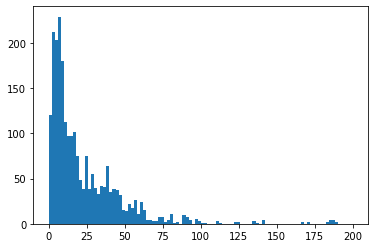

In [8]:
# And __LOOK__:

matplotlib.pyplot.hist(pt, bins=100, range=(0, 200));

In [9]:
# Compute p of all muon pairs:

p = numpy.sqrt(pt**2 + (pz1 + pz2)**2)
p

array([116.61271581, 117.90010197, 117.36645448, ..., 230.90205217,
       232.63405045, 232.88789491])

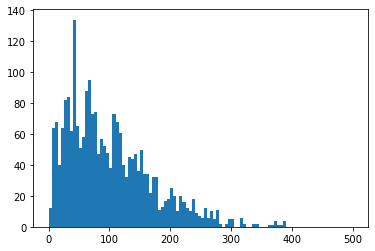

In [10]:
# And __LOOK__:

matplotlib.pyplot.hist(p, bins=100, range=(0, 500));

In [11]:
# Compute mass of all muon pairs:

mass = numpy.sqrt((E1 + E2)**2 - p**2)
mass

array([82.46269156, 83.62620401, 83.30846467, ..., 95.96547966,
       96.49594382, 96.65672765])

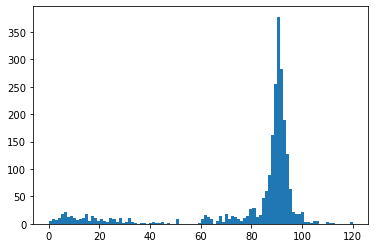

In [12]:
# And __LOOK__:

matplotlib.pyplot.hist(mass, bins=100, range=(0, 120));

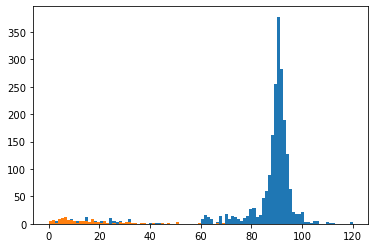

In [13]:
# Start adding cuts, exploring different regions, etc.

matplotlib.pyplot.hist(mass[Q1 != Q2], bins=100, range=(0, 120));
matplotlib.pyplot.hist(mass[Q1 == Q2], bins=100, range=(0, 120));

<br><br><br>

<p style="font-size: 1.25em">This is the point: you calculate <i>one thing</i> and then you <i>LOOK</i> at the result.</p>

<br>

<p style="font-size: 1.25em">Array-at-a-time logic gives you a statistical view of each <i>step</i> in your calculation as you develop it.</p>

<br>

<p style="font-size: 1.25em">It's not always about the speed; sometimes it's about the interactivity.</p>

<br><br><br>

Welcome to JupyROOT 6.18/00


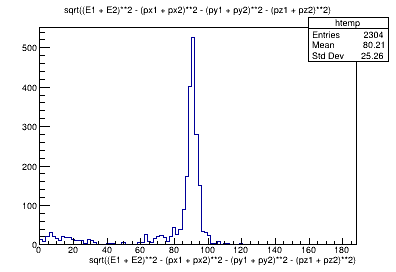

In [14]:
# As physicists, we know this. That's why we have TTree-at-a-time operations.

import ROOT
canvas = ROOT.TCanvas("canvas", "", 400, 300)
file = ROOT.TFile("data/Zmumu.root")
tree = file.Get("events")
tree.Draw("sqrt((E1 + E2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2)")
canvas.Draw()

<br><br><br>

<p style="font-size: 1.25em">The hard part is turning those <tt>TTree::Draw</tt> expressions into a full analysis.</p>

<br>

<p style="font-size: 1.25em">How many of you have started with <tt>TTree::Draw</tt> and had to rewrite everything as a C++ loop?</p>

<br>

<p style="font-size: 1.25em">Our goal is to do initial exploration in a convenient way and then scale up without having to change everything.</p>

<br><br><br>

<br><br><br><br><br>

### Part 2: There's an app for that

<br><br><br><br><br>

<img src="img/shells-1.png" width="80%">

<i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-2.png" width="80%">

<i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-3.png" width="80%">

<i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-4.png" width="80%">

<i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-5.png" width="80%">

<i>(Stolen from Jake Vanderplas.)</i>

<br><br>

<p style="font-size: 1.25em">Much of what we do, as physicists, are not new problems. You can learn a lot by attempting to write an algorithm yourself, but eventually you'll want to plug together functions from established libraries (that you understand!).</p>

<br>

<p style="font-size: 1.25em"><b>Wikipedia</b> (to learn the names of things) + <b>StackOverflow</b> (to find common solutions) is a good way to develop analysis code.</p>

<br>

<p style="font-size: 1.25em">Most of these solutions come in Numpy-shaped pieces.</p>

<br><br>

<br><br>

<p style="font-size: 100px"><img src="img/scipy-logo.png" width="45%" style="vertical-align: middle"> = <img src="img/numerical-recipes.jpg" width="25%" style="vertical-align: middle"></p>

<br><br>

<br>

<p style="font-size: 1.25em">SciPy was originally the "all in one" scientific package, but today, much of the development is beyond SciPy.</p>

| Date | Development |
|:----:|:-----|
| 1994 | **Python** 1.0 released. |
| 1995 | **Numeric** was the first array package (a.k.a. Numerical, Numerical Python, Numpy). |
| 2001 | **SciPy** gathered scientific functions into one codebase, including **Numeric**. |
| 2003 | **Matplotlib** released (at that time, one of many plotters... R.I.P. **Biggles**). |
| 2003 | **Numarray** introduced as a competitor to **Numeric** with more features (memory-mapped files, alignment, record arrays). |
| 2005 | **Numpy** unified features of **Numeric** and **Numarray** and became the common array library. |
| 2008 | **Pandas** first released. |
| 2010 | **Scikit-Learn** first released. |
| 2011 | **AstroPy** first released. |
| 2012 | **Anaconda** first released. |
| 2014 | **Jupyter** first released. |
| 2015 | **Keras** first released. |

<center><img src="img/scipy-docs.png" width="80%"></center>

In [15]:
import scipy.stats

?scipy.stats

Type:        module
String form: <module 'scipy.stats' from '/home/jpivarski/miniconda3/lib/python3.7/site-packages/scipy/stats/__init__.py'>
File:        ~/miniconda3/lib/python3.7/site-packages/scipy/stats/__init__.py
Docstring:  
Statistical functions (:mod:`scipy.stats`)

.. currentmodule:: scipy.stats

This module contains a large number of probability distributions as
well as a growing library of statistical functions.

Each univariate distribution is an instance of a subclass of `rv_continuous`
(`rv_discrete` for discrete distributions):

.. autosummary::
   :toctree: generated/

   rv_continuous
   rv_discrete
   rv_histogram

Continuous distributions

.. autosummary::
   :toctree: generated/

   alpha             -- Alpha
   anglit            -- Anglit
   arcsine           -- Arcsine
   argus             -- Argus
   beta              -- Beta
   betaprime         -- Beta Prime
   bradford          -- Bradford
   burr              -- Burr (Type III)
   burr12            -- Burr 

In [16]:
?scipy.stats.crystalball

Signature:       scipy.stats.crystalball(*args, **kwds)
Type:            crystalball_gen
String form:     <scipy.stats._continuous_distns.crystalball_gen object at 0x7bac251fd9b0>
File:            ~/miniconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
Crystalball distribution

As an instance of the `rv_continuous` class, `crystalball` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(beta, m, loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, beta, m, loc=0, scale=1)
    Probability density function.
logpdf(x, beta, m, loc=0, scale=1)
    Log of the probability density function.
cdf(x, beta, m, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, beta, m, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, beta, m, loc=0, scale=1)
    Survival function  (also defined as

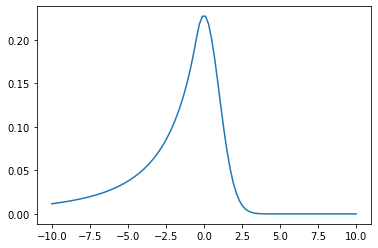

In [17]:
x = numpy.linspace(-10, 10, 100)
y = scipy.stats.crystalball.pdf(x, beta=0.5, m=3)     # logpdf, cdf

matplotlib.pyplot.plot(x, y);

In [18]:
scipy.stats.crystalball.rvs(beta=0.5, m=3, size=200)

array([-1.72036316e+01,  8.08046936e-01, -1.85733936e+00,  4.92263362e-01,
        9.26366172e-01, -2.30836227e+00,  3.53437752e-01, -3.06067775e+00,
        6.25901639e-01, -1.98501416e+00, -1.65142187e+00, -2.32275116e+00,
       -1.13710699e+00,  9.74515753e-01,  7.30925579e-01, -1.94252669e+00,
        2.52104159e-01,  5.55644666e-01, -8.07996359e-01, -2.37753843e+00,
       -2.12872716e-01, -1.07055842e+00, -1.56621942e+01, -1.09019963e+01,
       -6.11083898e-01,  4.79215244e-01,  1.47046094e-01, -4.08126405e+00,
        2.60885207e+00, -2.56094530e+00, -4.06260669e+00, -1.54755267e+00,
       -1.56129861e+01, -1.23503207e+00, -2.25302859e-01, -5.39692288e+00,
       -2.36934865e-01, -1.75495408e+01, -1.26322186e+00, -1.33856836e+00,
        1.09404787e+00, -1.80016059e+00, -5.47083935e+00,  1.21128752e+00,
       -1.82189576e+01, -9.57065851e+00,  1.60510335e+00, -1.41054435e+00,
       -2.35430517e+01, -3.53365890e+00,  1.75647790e+00, -1.87391280e-01,
       -1.65269893e+00, -

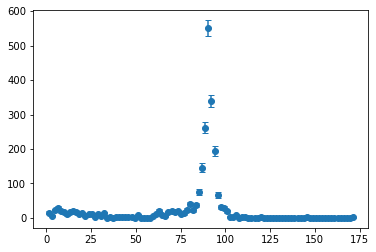

In [19]:
masses = uproot.open("data/Zmumu.root")["events"].array("M")

y, edges = numpy.histogram(masses, bins=100)
yerr = numpy.sqrt(y)

# the middle of each bin
x = (edges[1:] + edges[:-1])/2

matplotlib.pyplot.errorbar(x, y, yerr, fmt="o", capsize=3);

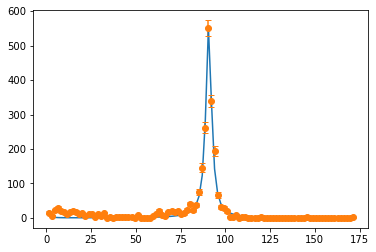

In [20]:
import scipy.optimize

def f(x, a, b, c, d):
    return a*scipy.stats.cauchy.pdf(x, b, c) + d/x**2

parameters, errors = scipy.optimize.curve_fit(f, x[y > 0], y[y > 0], sigma=yerr[y > 0])  # exclude y == 0

matplotlib.pyplot.plot(x, f(x, *parameters))
matplotlib.pyplot.errorbar(x, y, yerr, fmt="o", capsize=3);

<br><br><br><br><br>

<p style="font-size: 1.25em"><b>Five minute challenge:</b> using only commands from the previous cell, plot the fit residuals.</p>

<br><br><br><br><br>

<img src="img/iminuit.png" width="100%">

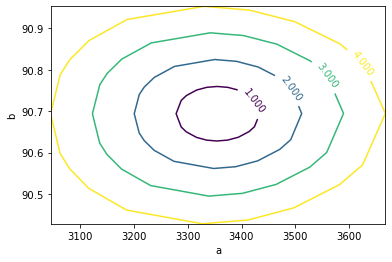

In [21]:
import iminuit

def chi2(a, b, c, d):
    return ((y[y > 0] - f(x[y > 0], a, b, c, d))**2 / yerr[y > 0]**2).sum()

m = iminuit.Minuit(chi2, errordef=1,
                   a=3350, b=91, c=2, d=30,
                   error_a=100, error_b=1, error_c=0.1, error_d=10)
m.migrad()
m.hesse()
m.minos()
m.draw_mncontour("a", "b", nsigma=4);

<br><br><br>

<center><img src="img/scikit-learn-logo.png" width="40%"></center>

<br><br><br>

<br><br><br>

<p style="font-size: 1.25em">To branch out in a modular way, SciPy introduced the idea of "SciKits"—separate packages from SciPy that have a similar interface.</p>

<br>

<p style="font-size: 1.25em">The most famous of these is Scikit-Learn, a package that gathered all machine learning algorithms under one roof—just before the deep learning revolution...</p>


<br><br><br>

<img src="img/scikit-learn-estimators.png" width="100%">

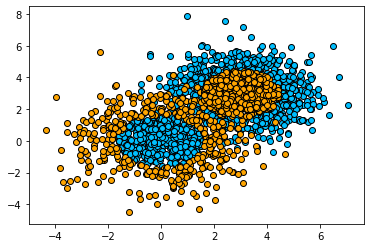

In [22]:
import sklearn.datasets
X1, y1 = sklearn.datasets.make_gaussian_quantiles(
    cov=2.0, n_samples=800, n_features=2, n_classes=2, random_state=1)
X2, y2 = sklearn.datasets.make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=1200, n_features=2, n_classes=2, random_state=1)
X = numpy.concatenate((X1, X2))
y = numpy.concatenate((y1, -y2 + 1))

# Example of a hard classification problem.
matplotlib.pyplot.scatter(X[y == 0, 0], X[y == 0, 1], c="deepskyblue", edgecolor="k");
matplotlib.pyplot.scatter(X[y == 1, 0], X[y == 1, 1], c="orange", edgecolor="k");

In [23]:
import sklearn.tree

# Example model: decision tree classifier
model = sklearn.tree.DecisionTreeClassifier(max_depth=10)

# Consistent interface: nearly every model has a fit method with this signature
model.fit(X, y)

print("predictions:\n", model.predict(X))
print("truth:\n", y)

predictions:
 [0 1 1 ... 0 0 1]
truth:
 [0 1 1 ... 0 0 1]


In [24]:
import sklearn.ensemble

# Another model: boosted decision tree
model = sklearn.ensemble.AdaBoostClassifier(
    sklearn.tree.DecisionTreeClassifier(max_depth=2), algorithm="SAMME", n_estimators=100)

model.fit(X, y)

print("predictions:\n", model.predict(X))
print("truth:\n", y)

predictions:
 [0 1 0 ... 1 1 1]
truth:
 [0 1 1 ... 0 0 1]


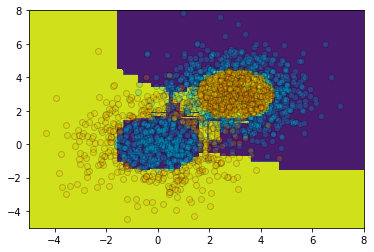

In [25]:
xx, yy = numpy.meshgrid(numpy.arange(-5, 8, 0.02), numpy.arange(-5, 8, 0.02))
Z = model.predict(numpy.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Overlay the training points on the decision boundary.
matplotlib.pyplot.contourf(xx, yy, Z);
matplotlib.pyplot.scatter(X[y == 0, 0], X[y == 0, 1], c="deepskyblue", edgecolor="k", alpha=0.2);
matplotlib.pyplot.scatter(X[y == 1, 0], X[y == 1, 1], c="orange", edgecolor="k", alpha=0.2);
matplotlib.pyplot.xlim(-5, 8);
matplotlib.pyplot.ylim(-5, 8);

<br><br><br>

<p style="font-size: 1.25em">Notice that we have the same Numpy interfaces everywhere, and everything acts one array at a time, rather than one value at a time.</p>

<br>

<p style="font-size: 1.25em">The new deep learning frameworks define their own array types (e.g. PyTorch tensors, TensorFlow tensors), but these are very similar to Numpy arrays, with the addition that they can move data to and from GPUs.</p>

<br><br><br>

<img src="img/scikit-hep-page.png" width="100%">

<br><br><br>

<p style="font-size: 1.25em"><b>Example 1:</b> pyjet, a Numpythonic wrapper for FastJet</p>

<br><br><br>

In [26]:
# First, make a fake-o Monte Carlo: three clusters at specified central values
fourvectors = numpy.empty(1000, dtype=[("E", float), ("px", float),
                                       ("py", float), ("pz", float)])
indexes = numpy.random.randint(0, 3, 1000)

#                        i   pt   eta    phi
for i, pt, eta, phi in [(0, 0.5,  0.5,     0),   # cluster center 0
                        (1, 0.2, -0.8,  1.57),   # cluster center 1
                        (2, 0.1,  0.3, -1.57)]:  # cluster center 2
    this = (indexes == i)
    pt = abs(numpy.random.normal(pt, 0.1, this.sum()))
    eta = numpy.random.normal(eta, 0.03, this.sum())
    phi = numpy.random.normal(phi, 0.3, this.sum())
    fourvectors["px"][this] = px = (pt*numpy.cos(phi)*numpy.cosh(eta))
    fourvectors["py"][this] = py = (pt*numpy.sin(phi)*numpy.cosh(eta))
    fourvectors["pz"][this] = pz = (pt*numpy.sinh(eta))
    fourvectors["E"][this]  = numpy.sqrt(px**2 + py**2 + pz**2)

fourvectors[:5]

array([(0.08220963, 0.01673939, -0.07650449,  0.02500557),
       (0.61890405, 0.55747803, -0.0677895 ,  0.26012509),
       (0.36398172, 0.01831549,  0.30128464, -0.20340796),
       (0.36103217, 0.05255898, -0.34410183,  0.09578994),
       (0.36571832, 0.07214153,  0.29491113, -0.20389436)],
      dtype=[('E', '<f8'), ('px', '<f8'), ('py', '<f8'), ('pz', '<f8')])

In [27]:
import pyjet

# This is FastJet, running in C++.
# 
# By passing all particles, array-at-a-time, we avoid Python's slowness.

clustering = pyjet.cluster(fourvectors, R=1.0, p=-1, ep=True)
clustering.inclusive_jets()

[PseudoJet(pt=181.662, eta=0.468, phi=-0.023, mass=57.542),
 PseudoJet(pt=89.711, eta=-0.648, phi=1.599, mass=27.572),
 PseudoJet(pt=33.540, eta=0.299, phi=-1.565, mass=9.122),
 PseudoJet(pt=0.388, eta=-0.627, phi=2.701, mass=0.000),
 PseudoJet(pt=0.198, eta=-0.628, phi=0.592, mass=0.000)]

<br><br><br>

<p style="font-size: 1.25em"><b>Example 2:</b> particle, an interface to Particle Data Tables</p>

<br><br><br>

In [28]:
import particle
from hepunits.units import cm

import IPython.display

# Find all strange baryons with c*tau > 1 cm
for x in particle.Particle.findall(lambda p:
    p.pdgid.is_baryon and p.pdgid.has_strange and p.width > 0 and p.ctau > 1 * cm):
    
    IPython.display.display(IPython.display.Latex("$" + x.latex_name + "$"))
    print(repr(x), end="\n\n")

<IPython.core.display.Latex object>

<Particle: name="Sigma-", pdgid=3112, mass=1197.45 ± 0.03 MeV>



<IPython.core.display.Latex object>

<Particle: name="Sigma~+", pdgid=-3112, mass=1197.45 ± 0.03 MeV>



<IPython.core.display.Latex object>

<Particle: name="Lambda", pdgid=3122, mass=1115.683 ± 0.006 MeV>



<IPython.core.display.Latex object>

<Particle: name="Lambda~", pdgid=-3122, mass=1115.683 ± 0.006 MeV>



<IPython.core.display.Latex object>

<Particle: name="Sigma+", pdgid=3222, mass=1189.37 ± 0.07 MeV>



<IPython.core.display.Latex object>

<Particle: name="Sigma~-", pdgid=-3222, mass=1189.37 ± 0.07 MeV>



<IPython.core.display.Latex object>

<Particle: name="Xi-", pdgid=3312, mass=1321.71 ± 0.07 MeV>



<IPython.core.display.Latex object>

<Particle: name="Xi~+", pdgid=-3312, mass=1321.71 ± 0.07 MeV>



<IPython.core.display.Latex object>

<Particle: name="Xi0", pdgid=3322, mass=1314.86 ± 0.20 MeV>



<IPython.core.display.Latex object>

<Particle: name="Xi~0", pdgid=-3322, mass=1314.86 ± 0.20 MeV>



<IPython.core.display.Latex object>

<Particle: name="Omega-", pdgid=3334, mass=1672.5 ± 0.3 MeV>



<IPython.core.display.Latex object>

<Particle: name="Omega~+", pdgid=-3334, mass=1672.5 ± 0.3 MeV>



<br><br><br>

<p style="font-size: 1.25em"><b>Example 3:</b> pyhf, limit-setting similar to HistFactory and CmsCombine</p>

<br><br><br>

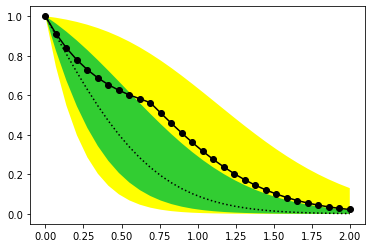

In [29]:
import pyhf                                                        # (scale to 125%)
import awkward

s, b, obs = [[0.0, 0.0, 0.1, 0.2, 0.5, 1.0, 1.8, 2.7, 2.0, 0.3],   # signal peaks around bin 8
             [6.0, 5.5, 4.5, 3.8, 3.3, 2.6, 2.0, 1.8, 1.5, 1.0],   # background steadily falls
             [  6,   7,   4,   4,   4,   3,   4,   3,   4,   0]]   # observations perfer 3/4 signal
model = pyhf.simplemodels.hepdata_like(signal_data=s, bkg_data=b, bkg_uncerts=numpy.sqrt(b).tolist())
def hypotest(mu):
    return pyhf.utils.hypotest(mu, obs + model.config.auxdata, model, return_expected_set=True)

mus = numpy.linspace(0, 2, 30)
CLs = awkward.fromiter([hypotest(mu) for mu in mus])
CLs_observed = CLs[:, 0, 0]                                        # mucking around with indexes
CLs_minus2, CLs_minus1, CLs_expected, CLs_plus1, CLs_plus2 = [CLs[:, 1, i, 0] for i in range(5)]

matplotlib.pyplot.fill_between(mus, CLs_minus2, CLs_plus2, facecolor="yellow");
matplotlib.pyplot.fill_between(mus, CLs_minus1, CLs_plus1, facecolor="limegreen");
matplotlib.pyplot.plot(mus, CLs_expected, c="black", linestyle="dotted");
matplotlib.pyplot.plot(mus, CLs_observed, c="black", marker="o");

<br><br><br><br><br>

### Part 3: ROOT data in Python

<br><br><br><br><br>

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


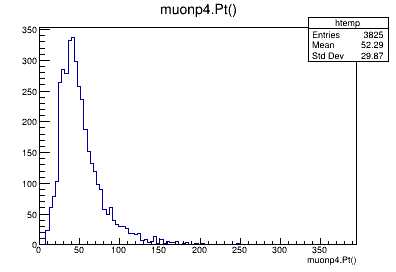

In [30]:
import ROOT                                   # PyROOT

file = ROOT.TFile("data/HZZ-objects.root")    # PyROOT transliterates C++ to Python
tree = file.Get("events")

canvas = ROOT.TCanvas("canvas", "", 400, 300) # JupyROOT only: must create TCanvas
tree.Draw("muonp4.Pt()")
canvas.Draw()                                 # and Draw it to see plots inline

In [31]:
# PyROOT can iterate over the data directly, in a Python-friendly way.

for i, event in enumerate(tree):
    print("event", i)
    for muon in event.muonp4:
        print(repr(muon), muon.Pt())
    if i > 10:
        break

event 0
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08ab5f5770> 54.16810703140204
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08ab5f57b0> 37.74415265978988
event 1
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08ab5f5770> 24.41791248135961
event 2
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08ab5f5770> 53.58826697278532
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08ab5f57b0> 29.811997139120674
event 3
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08ab5f5770> 88.63194310332618
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08ab5f57b0> 77.95148447265454
event 4
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08ab5f5770> 81.01140452083426
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08ab5f57b0> 47.17504574667714
event 5
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08ab5f5770> 41.591052358050575
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08ab5f57b0> 30.844215085173435
event 6
<ROOT.TLorentzVec

<br><br>

<p style="font-size: 1.25em">But be forewarned: PyROOT was not made to be used in a loop over big data. (Actually, it's as much slower than Python as Python is from C++.)</p>

<br>

<p style="font-size: 1.25em">You can start this way, but if you'll be analyzing TB of data, you'll have to rewrite your code.</p>

<br>

<p style="font-size: 1.25em">We want to explore data in a way that doesn't have to be completely rewritten for speed.</p>

<br><br>

In [32]:
# PyROOT's new AsMatrix method gives you Numpy arrays directly (loops run in C++).

tree.AsMatrix(["eventweight"])

array([[0.00927101],
       [0.00033064],
       [0.00507963],
       ...,
       [0.00415307],
       [0.00882933],
       [0.00875541]])

In [33]:
# But it's only for purely numeric data, not objects...

tree.AsMatrix(["MET"])

Exception: Reading of branch ['MET'] is not supported (branch has unsupported data-type ['TVector2']).

In [34]:
# ... and not variable number of values per event, like vector<float>

tree.AsMatrix(["muoniso"])

Exception: Reading of branch ['muoniso'] is not supported (branch has unsupported data-type ['vector<float>']).

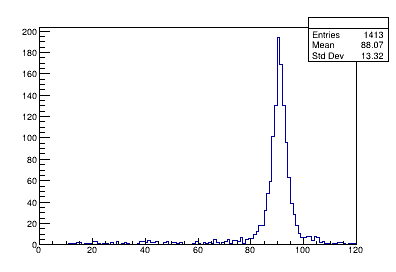

In [35]:
# ROOT's new preferred way of processing TTrees is called RDataFrame.
# You can define a dataflow in Python with C++ in strings (convenient!).

rdf = ROOT.RDataFrame("events", "data/HZZ-objects.root")
h = (rdf.Filter("muonp4.size() >= 2")
        .Define("zmass", r"""(muonp4[0] + muonp4[1]).M()""")
        .Histo1D(("", "", 120, 0, 120), "zmass"))
h.Draw(); canvas.Draw()

In [36]:
# And you can get the result of this dataflow as Numpy arrays (even better!).

array = (rdf.Filter("muonp4.size() >= 2")
            .Define("zmass", r"""(muonp4[0] + muonp4[1]).M()""")
            .AsNumpy(columns=["zmass"]))
array

{'zmass': numpy.array([90.22779777, 74.74654928, 89.75736376, ..., 92.06495256,
              85.44384208, 75.96066262])}

In [37]:
# You can also get arrays of objects and arrays of vectors of objects.

array = rdf.AsNumpy(columns=["muonp4"])["muonp4"]
array

numpy.array([<ROOT.ROOT::VecOps::RVec<TLorentzVector> object at 0x5a08b5f8f790>,
             <ROOT.ROOT::VecOps::RVec<TLorentzVector> object at 0x5a08b5f8f7b8>,
             <ROOT.ROOT::VecOps::RVec<TLorentzVector> object at 0x5a08b5f8f7e0>,
             ...,
             <ROOT.ROOT::VecOps::RVec<TLorentzVector> object at 0x5a08b5fa7160>,
             <ROOT.ROOT::VecOps::RVec<TLorentzVector> object at 0x5a08b5fa7188>,
             <ROOT.ROOT::VecOps::RVec<TLorentzVector> object at 0x5a08b5fa71b0>],
            dtype=object)

In [38]:
# But looping over them is back to PyROOT. The array is an array of PyROOT objects.

for i, event in enumerate(array):
    print("event", i)
    for muon in event:
        print(repr(muon), muon.Pt())
    if i > 10:
        break

event 0
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08b5d0f2c0> 54.16810703140204
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08b5d0f300> 37.74415265978988
event 1
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08b5d0f350> 24.41791248135961
event 2
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08b5d0f3a0> 53.58826697278532
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08b5d0f3e0> 29.811997139120674
event 3
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08b54d1d50> 88.63194310332618
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08b54d1d90> 77.95148447265454
event 4
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08b54d1de0> 81.01140452083426
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08b54d1e20> 47.17504574667714
event 5
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08b54d1e70> 41.591052358050575
<ROOT.TLorentzVector object ("TLorentzVector") at 0x5a08b54d1eb0> 30.844215085173435
event 6
<ROOT.TLorentzVec

<br><br><br>

<p style="font-size: 1.25em">To get efficient processing in ROOT, you have to do the heavy work in C++. That's just how it works. What's new is that the C++ can be expressed as inline strings in Python.</p>

<br><br><br>

<br><br>

<p style="font-size: 1.25em">uproot is an alternative ROOT I/O implemented in Python + Numpy (i.e. it's pip-installable).</p>

<br>

<center><img src="img/abstraction-layers.png" width="80%"></center>

<br><br>

In [39]:
import uproot

file = uproot.open("data/HZZ-objects.root")
tree = file["events"]

array = tree.array("muonp4")
array

<JaggedArrayMethods [[TLorentzVector(-52.899, -11.655, -8.1608, 54.779) TLorentzVector(37.738, 0.69347, -11.308, 39.402)] [TLorentzVector(-0.81646, -24.404, 20.2, 31.69)] [TLorentzVector(48.988, -21.723, 11.168, 54.74) TLorentzVector(0.82757, 29.801, 36.965, 47.489)] ... [TLorentzVector(-29.757, -15.304, -52.664, 62.395)] [TLorentzVector(1.1419, 63.61, 162.18, 174.21)] [TLorentzVector(23.913, -35.665, 54.719, 69.556)]] at 0x7bac2e62b160>

In [40]:
# Although this looks like an array of variable-length arrays of TLorentzVectors,
# it's implmented in terms of columnar arrays, not objects.
print(array.layout)
print(f"\narray for TLorentzVector.fX:\n{array.layout[2, 0, 4].array}")

 layout 
[     ()] JaggedArrayMethods(starts=layout[0], stops=layout[1], content=layout[2])
[      0]   ndarray(shape=2421, dtype=dtype('int64'))
[      1]   ndarray(shape=2421, dtype=dtype('int64'))
[      2]   ObjectArrayMethods(content=layout[2, 0], generator=<function ArrayMethods._initObjectArray.<locals>.<lambda> at 0x7bac2e39e6a8>, args=(), kwargs={})
[   2, 0]     Table( fBits=layout[2, 0, 0],  fUniqueID=layout[2, 0, 1],  fBits2=layout[2, 0, 2],  fUniqueID2=layout[2, 0, 3], fX=layout[2, 0, 4], fY=layout[2, 0, 5], fZ=layout[2, 0, 6], fE=layout[2, 0, 7])
[2, 0, 0]       ndarray(shape=3825, dtype=dtype('uint64'))
[2, 0, 1]       ndarray(shape=3825, dtype=dtype('uint64'))
[2, 0, 2]       ndarray(shape=3825, dtype=dtype('uint64'))
[2, 0, 3]       ndarray(shape=3825, dtype=dtype('uint64'))
[2, 0, 4]       ndarray(shape=3825, dtype=dtype('float64'))
[2, 0, 5]       ndarray(shape=3825, dtype=dtype('float64'))
[2, 0, 6]       ndarray(shape=3825, dtype=dtype('float64'))
[2, 0, 7]       n

In [41]:
# So the interface is array-at-a-time: neither for loops nor call-outs to C++.

good_events = (array.counts >= 2)
print(f"good_events: {good_events}")

first  = array[good_events, 0]
second = array[good_events, 1]
print(f"\nfirst:       {first}")
print(f"second:      {second}")

z_candidates = first + second
print(f"\nz_mass:      {z_candidates.mass}")

good_events: [ True False  True ... False False False]

first:       [TLorentzVector(-52.899, -11.655, -8.1608, 54.779) TLorentzVector(48.988, -21.723, 11.168, 54.74) TLorentzVector(22.088, -85.835, 403.85, 413.46) ... TLorentzVector(53.006, -24.486, 13.952, 60.032) TLorentzVector(55.72, 26.37, -24.588, 66.368) TLorentzVector(34.507, 28.84, -150.66, 157.23)]
second:      [TLorentzVector(37.738, 0.69347, -11.308, 39.402) TLorentzVector(0.82757, 29.801, 36.965, 47.489) TLorentzVector(76.692, -13.956, 335.09, 344.04) ... TLorentzVector(-30.209, 19.269, 18.661, 40.399) TLorentzVector(-26.914, -9.8128, -0.38995, 28.65) TLorentzVector(-31.568, -10.424, -111.26, 116.13)]

z_mass:      [90.22779777 74.74654928 89.75736376 ... 92.06495256 85.44384208
 75.96066262]


<br><br><br><br><br>

<p style="font-size: 1.25em; text-align: center">Which one should you use?</p>

<br><br><br><br><br>

<br><br><br><br><br>

<p style="font-size: 2em; font-weight: bold; text-align: center">Both!</p>

<br><br><br><br><br>